# Graphs

<center>
    (Download this file as
    an <a href="graphs.html"  download>HTML file</a> or
    a  <a href="graphs.ipynb" download>Jupyter notebook</a>.)
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Phase 1: Find the nodes of the graph

In [34]:
english4 = dict() # english4 = {}

with open('English.dat') as file:
    while line := file.readline():
        word = line.rstrip() # Removes End Of Line

        if len(word) == 4:
            # Initialise the adjacency lists as empty sets
            english4[word] = set()

In [36]:
len(english4)

2599

## Phase 2: Find the edges of the graph

Algorithm 1

```
FOR every node U of the graph:
    FOR every node V of the graph:
        IF U != V:
            IF U and V differ at exactly one position:
                CREATE an edge between U and V           
```

```
ALGORITHM COUNT_DIFF(U, V):
    n is the number of chars of U and V
    diff = 0
    FOR i in 0 ... n - 1:
        IF the i-th char of U is != i-th char of V:
            diff = diff + 1
            
    RETURN diff
```

In [20]:
def count_diff(u, v):
    n = len(u)
    d = 0
    
    for i in range(n):
        if u[i] != v[i]:
            d = d + 1

    return d

In [21]:
count_diff('abc', 'def')

3

In [22]:
count_diff('house', 'mouse')

1

In [23]:
count_diff('house', 'house')

0

If there are $n$ words in the dictionary, the body will be executed $n^2$ times.

$O(n^2)$

$O(n^2=10^{18})$

In [37]:
for u in english4:
    for v in english4:
        if u != v:
            if count_diff(u, v) == 1:
                english4[u].add(v)
                english4[v].add(u)

In [25]:
english4 # Adjacency lists

{'fail': {'tail'}, 'tail': {'fail', 'tall'}, 'port': set(), 'tall': {'tail'}}

In [38]:
degree = dict()

for u in english4:
    degree[u] = len(english4[u])

In [30]:
degree

{'fail': 1, 'tail': 2, 'port': 0, 'tall': 1}

In [32]:
degree.values()

dict_values([1, 2, 0, 1])

In [40]:
max(degree.values())

26

(array([ 77., 123., 157., 165., 159., 136., 159., 134., 153., 146., 141.,
        140., 130., 135., 134., 108.,  99.,  75.,  56.,  42.,  48.,  25.,
         30.,  14.,   5.,   7.,   1.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

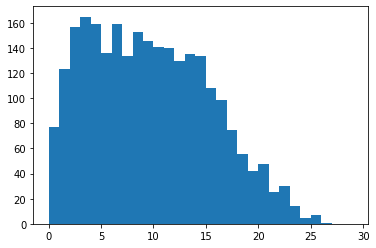

In [41]:
plt.hist(degree.values(), bins=list(range(30)))